In [7]:
#Annexes. Initialisation
import visualID as vID
from visualID import color
vID.init()

**Début à:** Monday 30 May 2022, 13:31:51  
**Hostname:** insa-11357 (Linux)

<p style="text-align: center"><img width="800px" src="./svg/logoBegin.svg" style="margin-left:auto; margin-right:auto"></img></p>

## Annexes & fonds de tiroirs

### A. Pandas et corrélation de données

**La première partie a pour but de créer des données au format pandas. Certaines sont corrélées entre elles. On va vérifier que la carte thermique est cohérente avec les corrélations**


Création des données. Vous n'avez aucune intervention à faire dans cette cellule, à part l'exécuter

In [2]:
import numpy as np 
import seaborn as sb
from pylab import *
import random
sb.set_style("ticks")

def noiseF(f, X):
    noise = 2
    N = noise * np.random.normal(0,1,(nbp,1))
#    print(N)
    # c_ "translates slice objects to concatenation along the second axis of the resulting 2D array" (cf doc)
    # en d'autres termes on concatène les colonnes de A & B quand on appelle c_(A,B) 
    tab = np.c_[X,f(X)+N]
    return tab 

def f0(x):
    return 50
def f1(x):
    return 3*x
def f2(x):
    return -5*x
def f3(x):
    return x**2
def f4(x):
    return sin(x)*50
def f5(x):
    return cos(x)*50

nbp = 100
xmin = -10
xmax = 10. 
# vecteur X
# random.uniform(low=0.0, high=1.0, size=None)
X = np.random.uniform(xmin,xmax,(nbp,1))
#print(X)
data0 = noiseF(f0,X)
data1 = noiseF(f1,X)
data2 = noiseF(f2,X)
data3 = noiseF(f3,X)
data4 = noiseF(f4,X)
data5 = noiseF(f5,X)

On va tracer les 4 fonctions pour voir à quoi elles ressemblent.  Vérifier de visu que les distributions de points sont cohérentes avec les expressions des fonctions

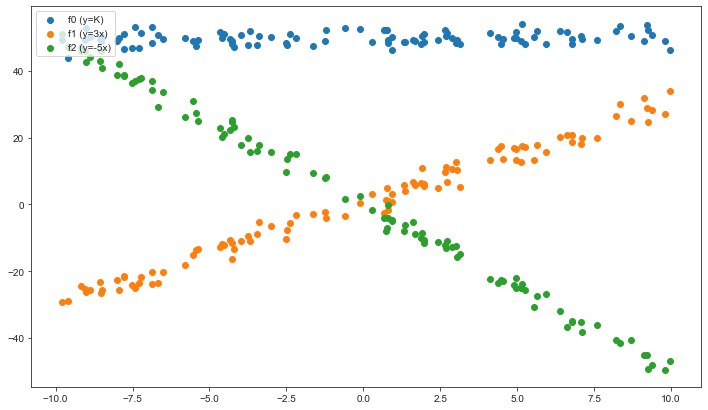

In [3]:
plt.rcParams["figure.figsize"] = (12,7) #on ajuste la taille du graphique
scatter(data0[:,0],data0[:,1],label='f0 (y=K)')
scatter(data1[:,0],data1[:,1],label='f1 (y=3x)')
scatter(data2[:,0],data2[:,1],label='f2 (y=-5x)')
legend(loc="upper left")

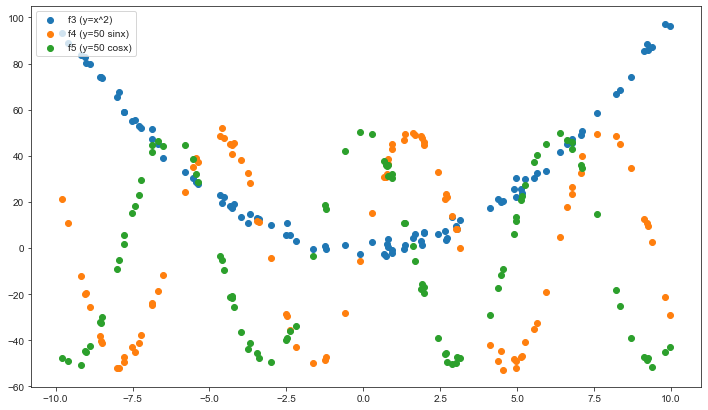

In [4]:
scatter(data3[:,0],data3[:,1],label='f3 (y=x^2)')
scatter(data4[:,0],data4[:,1],label='f4 (y=50 sinx)')
scatter(data5[:,0],data5[:,1],label='f5 (y=50 cosx)')
legend(loc="upper left")

On va maintenant stocker ces données au format pandas. La 1ère colonne du tableau `df` va contenir les valeurs de x, et les suivantes les valeurs que prennent les fonctions f0, f1, ... pour chacune des valeurs de x

In [5]:
import pandas as pd
df = pd.DataFrame(data0, columns = ['x','f0 (y=K)'])
df['f1 (y=3x)'] = pd.DataFrame(data1[:,1])
df['f2 (y=-5x)'] = pd.DataFrame(data2[:,1])
df['f3 (y=x^2)'] = pd.DataFrame(data3[:,1])
df['f4 (y=50 sinx)'] = pd.DataFrame(data4[:,1])
df['f5 (y=50 cosx)'] = pd.DataFrame(data5[:,1])

<div class="warn">Maintenant, à vous de jouer</div> 
(1) afficher le tableau `df`, qui contient les données

In [6]:
display(df)

,x,f0 (y=K),f1 (y=3x),f2 (y=-5x),f3 (y=x^2),f4 (y=50 sinx),f5 (y=50 cosx)
0,1.686730,48.895675,5.660910,-8.889756,6.259784,49.069316,-5.755787
1,-3.736225,47.639598,-9.433586,19.792574,10.691950,32.513434,-44.009008
2,2.996325,48.351091,12.674178,-12.505402,9.712107,8.053611,-49.897518
3,5.240486,48.145701,17.236986,-25.619296,29.745117,-40.813355,27.311475
4,6.376344,51.886294,20.079517,-32.011814,41.492410,4.755415,49.737908
...,...,...,...,...,...,...,...
95,-5.438859,47.479555,-13.623905,27.466872,28.713871,38.871818,32.137574
96,9.251728,52.140103,24.754896,-49.335943,85.781434,9.450981,-47.723530
97,-2.527929,48.383677,-10.310021,9.714324,5.764158,-28.589864,-39.893745
98,9.391140,50.735239,28.365627,-47.964342,87.388214,2.392224,-51.552730


(2) Afficher un aperçu de la distribution statistique des données

(3) Tracer toutes ces données les unes en fonctions des autres (*suggestion*: utiliser la fonction `pairplot`)

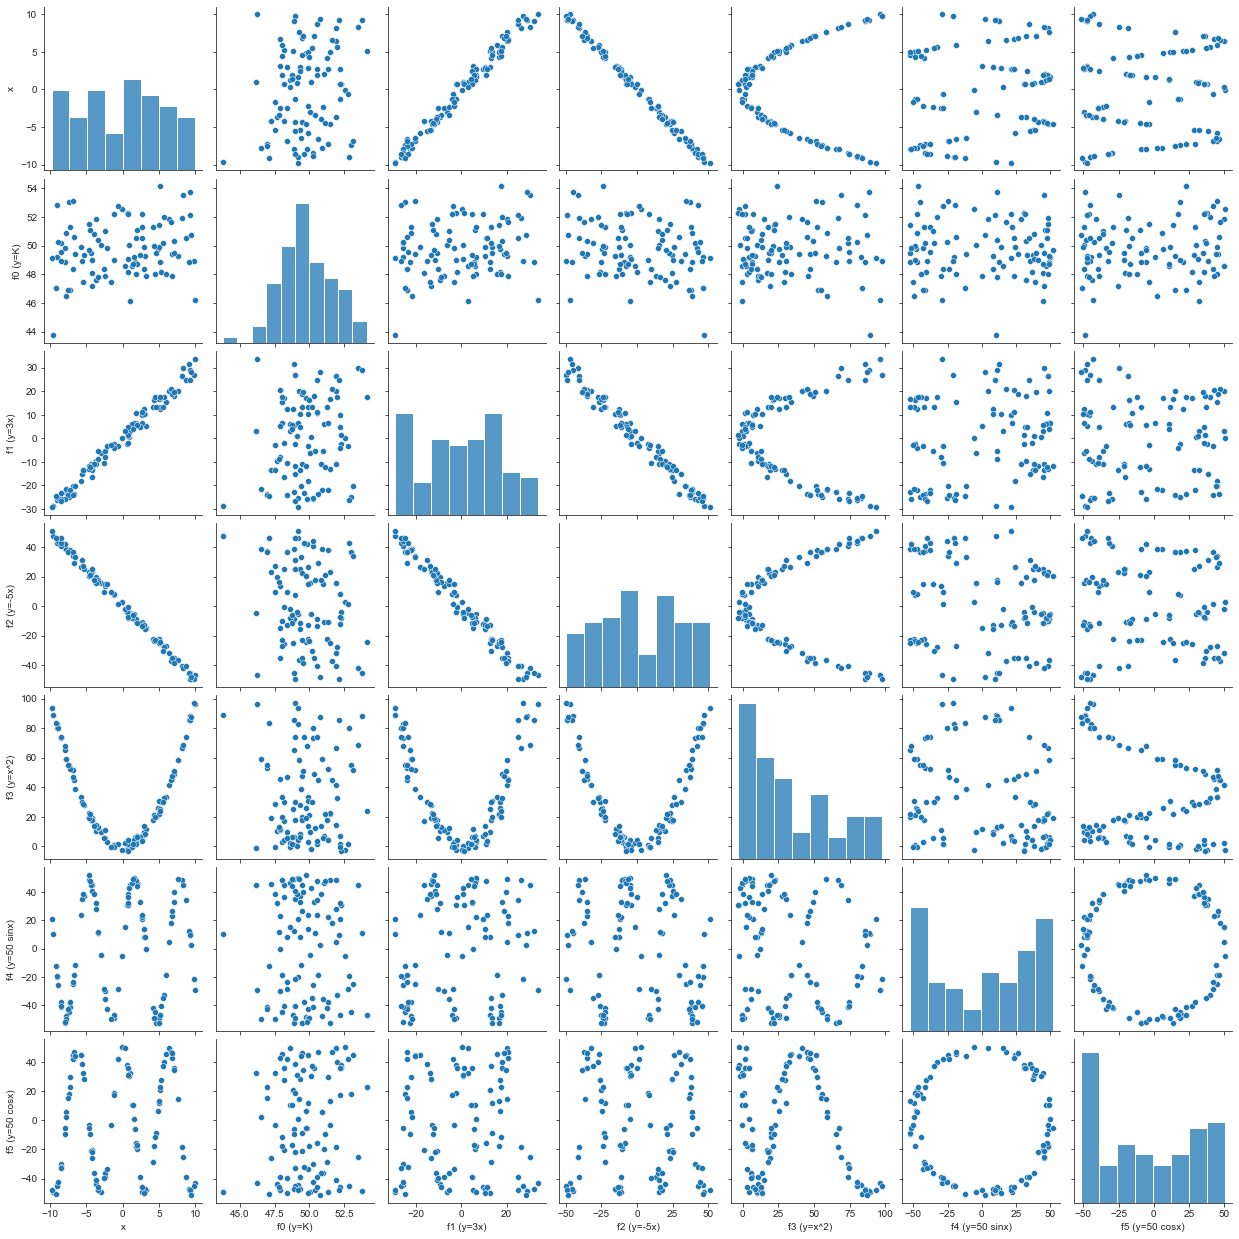

In [7]:
sb.pairplot(df)

(4) Tracer une carte thermique (*suggestion*: utiliser la fonction `heatmap`)

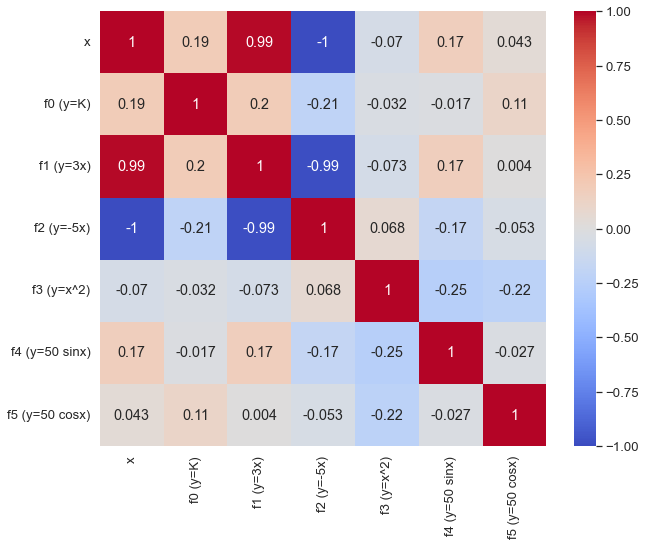

In [8]:
plt.figure(figsize = (10,8))
sb.set(font_scale=1.2)
_ = sb.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap='coolwarm')

### B. régression linéaire avec scikit learn

In [9]:
dfi=pd.read_csv('./iris-data/iris.csv', sep=";")
display(dfi)

from sklearn.linear_model import LinearRegression
pw = dfi["petal_width"].values.reshape(-1,1)
#print(pw.shape)
#print(pw)
pl = dfi["petal_length"].values
#print(pl.shape)
#print(pl)
# création de l'objet "régression linéaire"
fitlin = LinearRegression()

# recherche des paramètres du modèle linéaire
fitlin.fit(pw, pl)
pl_hat=fitlin.predict(pw)
a = fitlin.coef_
b = fitlin.intercept_
from sklearn.metrics import r2_score
r2 = r2_score(pl, pl_hat)
print("a   ={:8.3f}\nb   ={:8.3f}\nr^2 ={:8.5f}".format(a[0], b, r2))
from sklearn.metrics import mean_squared_error as MSE
print()
from sklearn.metrics import mean_absolute_error as MAE
print("MSE ={:8.3f}\nMAE ={:8.3f}".format(MSE(pl,pl_hat), MAE(pl,pl_hat)))

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


a   =   2.226
b   =   1.091
r^2 = 0.92690

MSE =   0.226
MAE =   0.368


### C. One-hot-encoding de la colonne "species"
On va ajouter des colonnes dans la base de données initiale. 

Cette préparation "amont" permet de simplifier ce TP en masquant cette difficulté (toute relative).

In [23]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils

dfi=pd.read_csv('./iris-data/iris.csv', sep=";")
print(f"Dfi. Structure (shape) :{dfi.shape}")
display(dfi)

# one-hot-encoding des espèces de y_train & y_test. 
# on utilise une fonction maison (y2c), qui elle-même appelle la fonction to_categorical de keras
# cette fonction est définie dans le package visualID importé au début ce ce notebook
uv = dfi["species"].unique()
print(f"Catégories uniques : {uv}") 
mapc2i = {}
for x in range(len(uv)):
    mapc2i[uv[x]] = x
print(f"Correspondance entre chaque catégorie unique et un entier : {mapc2i}")
species_ohe = vID.y2c(mapc2i,dfi["species"])
#

print(f"Structure (shape) de species_ohe : {species_ohe.shape}")
display(species_ohe)
del mapc2i
dfi[uv]=pd.DataFrame(species_ohe)
display(dfi)
dfi.to_csv('./iris-data/iris_ohe.csv',sep='\t',index=False)
del uv

Dfi. Structure (shape) :(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Catégories uniques : ['setosa' 'versicolor' 'virginica']
Correspondance entre chaque catégorie unique et un entier : {'setosa': 0, 'versicolor': 1, 'virginica': 2}
Structure (shape) de species_ohe : (150, 3)


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,setosa,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,setosa,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,setosa,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,setosa,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0.0,0.0,1.0
146,6.3,2.5,5.0,1.9,virginica,0.0,0.0,1.0
147,6.5,3.0,5.2,2.0,virginica,0.0,0.0,1.0
148,6.2,3.4,5.4,2.3,virginica,0.0,0.0,1.0


### X. Divers pour l'élaboration du sujet (arrière-cuisine)

#### X.1. Tracé d'une fonction linéaire bruitée

,x,y
0,6.305050,29.840278
1,6.323445,26.747410
2,5.965667,27.180391
3,1.017412,11.197824
4,-9.920961,-17.419067
...,...,...
95,-3.796331,-2.181064
96,-3.305084,4.069838
97,0.859222,16.120142
98,0.859611,8.017575


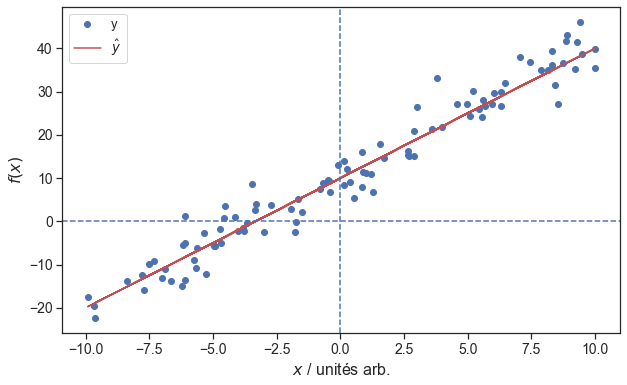

In [10]:
import numpy as np 
import seaborn as sb
import pandas as pd
import random
import matplotlib.pyplot as plt
sb.set_style("ticks")

def noiseF(f, X, noise):
    N = noise * np.random.normal(0,1,(nbp,1))
#    print(N)
    # c_ "translates slice objects to concatenation along the second axis of the resulting 2D array" (cf doc)
    # en d'autres termes on concatène les colonnes de A & B quand on appelle c_(A,B) 
    tab = np.c_[X,f(X)+N]
    return tab 

def f1(x):
    return 3*x+10

nbp = 100
xmin = -10
xmax = 10. 
# vecteur X
# random.uniform(low=0.0, high=1.0, size=None)
X = np.random.uniform(xmin,xmax,(nbp,1))
noisef1 = noiseF(f1,X,4)
f1tab = f1(X)
df1 = pd.DataFrame(noisef1, columns=['x','y'])
display(df1)
plt.rcParams["figure.figsize"] = (10,6)
axf1=df1.plot(x="x", y=["y"],fontsize=14, linestyle='', marker='o')
axf1.plot(X,f1tab,color='r',label='$\hat{y}$')
axf1.set_xlabel('$x$ / unités arb.',fontdict={'fontsize':16})
axf1.set_ylabel('$f(x)$',fontdict={'fontsize':16})
axf1.legend()
axf1.axvline(x = 0, color = 'b',linestyle='--')
axf1.axhline(y = 0, color = 'b',linestyle='--')
pngf1='./svg/fct1.png'
plt.savefig(pngf1,dpi=300,bbox_inches='tight',transparent=False)

#### X.2. Tracé d'une fonction quasi-linéaire bruitée

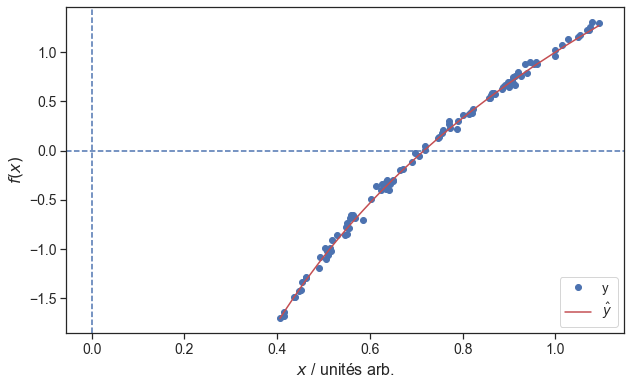

In [19]:
#exécuter d'abord le X.1
from numpy import log as ln
def f2(x):
    return 3*ln(x)+1

nbp = 100
xmin = 0.4
xmax = 1.1 
# vecteur X
# random.uniform(low=0.0, high=1.0, size=None)
X = np.random.uniform(xmin,xmax,(nbp,1))
index=np.argsort(X[:,0], axis=0)
noisef2 = noiseF(f2,X,0.04)
X=X[index]
noisef2=noisef2[index,:]
f2exact = f2(X)
df2 = pd.DataFrame(noisef2, columns=['x','y'])
plt.rcParams["figure.figsize"] = (10,6)
axf2=df2.plot(x="x", y=["y"],fontsize=14, linestyle='', marker='o')
axf2.plot(X,f2exact,color='r',label='$\hat{y}$')
axf2.set_xlabel('$x$ / unités arb.',fontdict={'fontsize':16})
axf2.set_ylabel('$f(x)$',fontdict={'fontsize':16})
axf2.legend()
axf2.axvline(x = 0, color = 'b',linestyle='--')
axf2.axhline(y = 0, color = 'b',linestyle='--')

np.savetxt('data/f2.csv', noisef2, delimiter="\t")

#### X.3. Tracé d'une fonction polynomiale bruitée

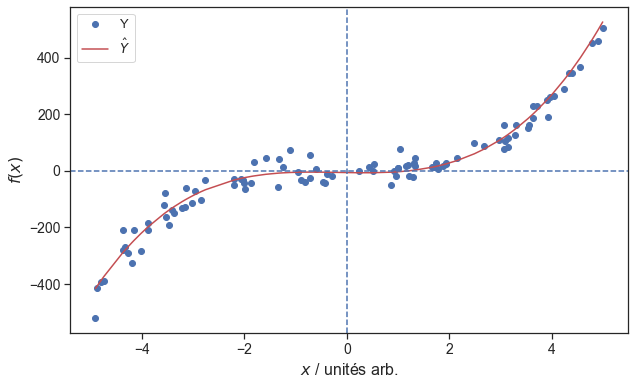

In [14]:
#exécuter d'abord le X.1
def fpol(x):
    return 4*x**3+2*x**2-3*x-6

nbp = 100
xmin = -5
xmax = 5 
# vecteur X
# random.uniform(low=0.0, high=1.0, size=None)
X = np.random.uniform(xmin,xmax,(nbp,1))
index=np.argsort(X[:,0], axis=0)
X=X[index]
noisefpol = noiseF(fpol,X,30)
fpolexact = fpol(X)

dfpol = pd.DataFrame(noisefpol, columns=['X','Y'])
plt.rcParams["figure.figsize"] = (10,6)
axfpol=dfpol.plot(x="X", y=["Y"],fontsize=14, linestyle='', marker='o')
axfpol.plot(X,fpolexact,color='r',label='$\hat{Y}$')
axfpol.set_xlabel('$x$ / unités arb.',fontdict={'fontsize':16})
axfpol.set_ylabel('$f(x)$',fontdict={'fontsize':16})
axfpol.legend()
axfpol.axvline(x = 0, color = 'b',linestyle='--')
axfpol.axhline(y = 0, color = 'b',linestyle='--')
np.savetxt('data/fpol.csv', noisefpol, delimiter="\t")

#### X.4. Tracé de la même fonction polynomiale, sans bruit

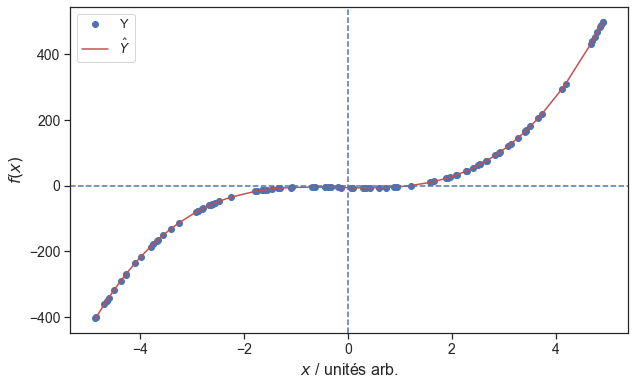

In [13]:
#exécuter d'abord le X.1, puis le X.3
X = np.random.uniform(xmin,xmax,(nbp,1))
index=np.argsort(X[:,0], axis=0)
X=X[index]
nonoisefpol = noiseF(fpol,X,0)
fpolexact = fpol(X)

dfpol = pd.DataFrame(nonoisefpol, columns=['X','Y'])
plt.rcParams["figure.figsize"] = (10,6)
axfpol=dfpol.plot(x="X", y=["Y"],fontsize=14, linestyle='', marker='o')
axfpol.plot(X,fpolexact,color='r',label='$\hat{Y}$')
axfpol.set_xlabel('$x$ / unités arb.',fontdict={'fontsize':16})
axfpol.set_ylabel('$f(x)$',fontdict={'fontsize':16})
axfpol.legend()
axfpol.axvline(x = 0, color = 'b',linestyle='--')
axfpol.axhline(y = 0, color = 'b',linestyle='--')
np.savetxt('data/fpolNoNoise.csv', nonoisefpol, delimiter="\t")

#### X.5. Sauvegarde des jointplots longueur/largeur

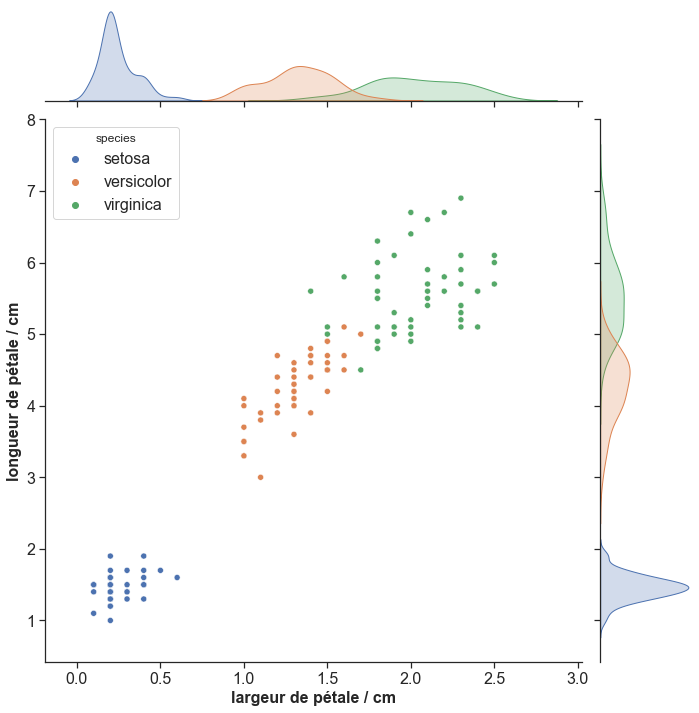

In [112]:
# importation de la libairie pandas
import pandas as pd
dfi=pd.read_csv('./iris-data/iris.csv', sep=";")
import seaborn as sb
import matplotlib as mp
import matplotlib.pyplot as plt
sb.set()
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16
plt.rcParams["axes.labelweight"] = "bold"
sb.set_style("whitegrid")
sb.set_style("ticks",{"xtick.major.size":20,"ytick.major.size":20})
sb.axes_style("whitegrid") 
g = sb.jointplot(x = "petal_width", y = "petal_length", data = dfi, hue='species', height=10, kind='scatter', joint_kws={"marker":'o'})
g.set_axis_labels("largeur de pétale / cm", "longueur de pétale / cm", fontsize=16)
plt.savefig('./svg/jointplot_petals.png',dpi=300,bbox_inches='tight',transparent=False)
plt.show()

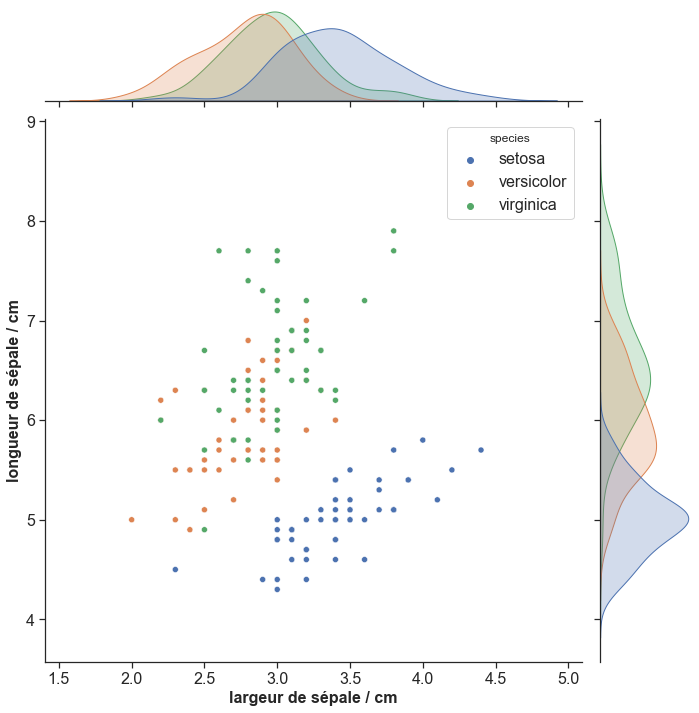

In [113]:
g = sb.jointplot(x = "sepal_width", y = "sepal_length", data = dfi, hue='species', height=10, kind='scatter', joint_kws={"marker":'o'})
g.set_axis_labels("largeur de sépale / cm", "longueur de sépale / cm", fontsize=16)
plt.savefig('./svg/jointplot_sepals.png',dpi=300,bbox_inches='tight',transparent=False)
plt.show()

In [14]:
vID.end()

**Fin à:** Tuesday 24 May 2022, 23:26:16  
**Durée:** 00:00:18 853ms

<p style="text-align: center"><img width="800px" src="./svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"></img></p>